In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [119]:
df = pd.read_csv("/content/Human_activity_recognition.csv")

In [120]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


So the data is collected Using its embedded accelerometer and gyroscope,captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz


* Accelerometers measure linear acceleration along one or several axis
* A gyroscope measures angular velocity (or rotation).
* For subject columns it indicates 1-30 participants

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [122]:
df.shape

(7352, 563)

In [123]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [124]:
df.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [125]:
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [126]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [127]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<Axes: xlabel='tBodyAcc-mean()-X', ylabel='Density'>

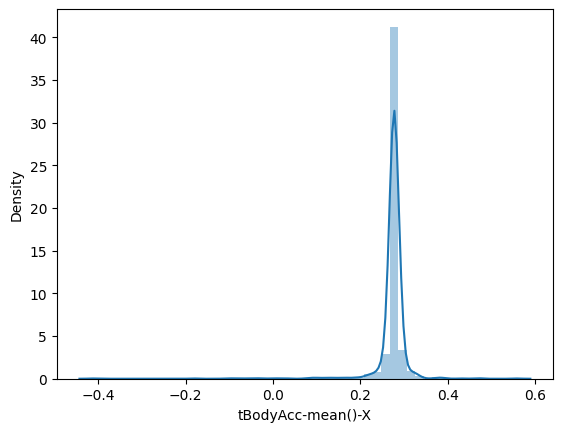

In [184]:

seaborn.distplot(df[df['Activity']=='SITTING']['tBodyAcc-mean()-X'] , hist = True, label = "SIITING")


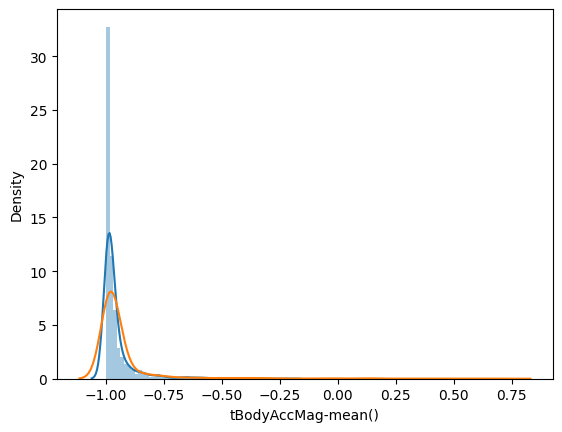

In [128]:
seaborn.distplot(df[df['Activity']=='SITTING']['tBodyAccMag-mean()'] , hist = True, label = "SIITING")
seaborn.distplot(df[df['Activity']=='LAYING']['tBodyAccMag-mean()'] , hist = False ,label = "LAYING")
import warnings
warnings.filterwarnings("ignore")

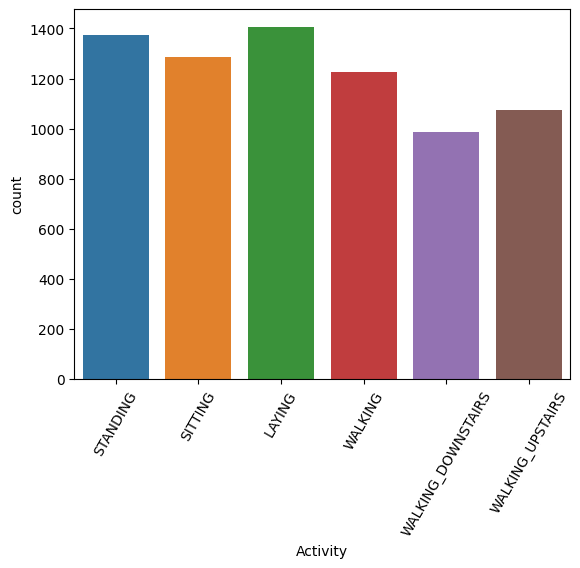

In [129]:
seaborn.countplot(data = df,x = "Activity")
plt.xticks(rotation = 60)
plt.show()

In [130]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [131]:
x = df.drop(["subject","Activity"],axis =1 )
y = df["Activity"]

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [133]:
log_reg = LogisticRegression()

In [134]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [135]:
log_reg.score(x_train,y_train)

0.9913280054412514

In [136]:
log_reg.score(x_test,y_test)

0.9789259007477906

In [137]:
data = pd.read_csv("/content/Human_activity_recognition_test.csv")

In [138]:
x_test_other = data.drop(["subject","Activity"],axis =1 )
y_test_other = data["Activity"]

In [139]:
data.shape

(2947, 563)

In [140]:
log_reg.score(x_test_other,y_test_other)

0.9548693586698337

In [141]:
y_pred = log_reg.predict(x_test)

In [142]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[273,   0,   0,   0,   0,   0],
       [  0, 258,  17,   0,   0,   0],
       [  0,  13, 263,   0,   0,   0],
       [  0,   0,   0, 245,   0,   1],
       [  0,   0,   0,   0, 182,   0],
       [  0,   0,   0,   0,   0, 219]])

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay

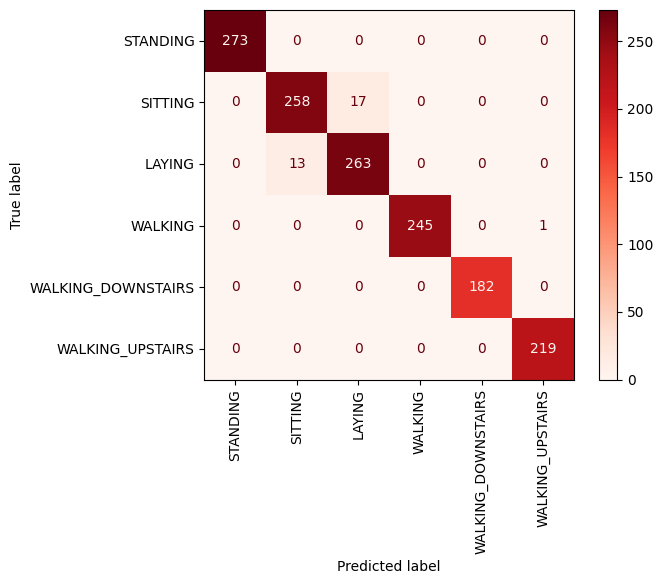

In [144]:
cm = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= df.Activity.unique())
disp.plot(cmap ='Reds')
plt.xticks(rotation = 90)
plt.show()

In [145]:
d_tree = DecisionTreeClassifier()

In [146]:
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
d_tree.score(x_train,y_train)

1.0

In [148]:
d_tree.score(x_test_other,y_test_other)

0.830335934848999

In [149]:
y_pred_dt = d_tree.predict(x_test_other)

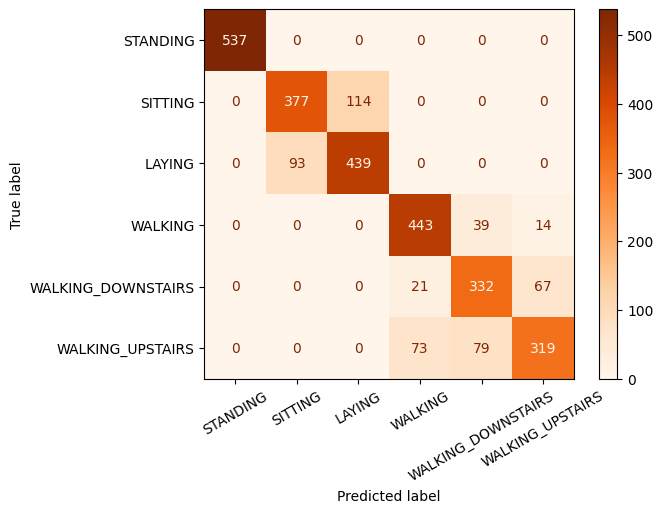

In [150]:
cm_dtree = confusion_matrix(y_test_other ,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree , display_labels= df.Activity.unique())
disp.plot(cmap ='Oranges')
plt.xticks(rotation = 30)
plt.show()


In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
k_nearest = KNeighborsClassifier()

In [153]:
k_nearest.fit(x_train,y_train)

KNeighborsClassifier()

In [154]:
k_nearest.score(x_train,y_train)

0.9818058153375276

In [155]:
k_nearest.score(x_test,y_test)

0.9605710401087696

In [156]:
k_nearest.score(x_test_other,y_test_other)

0.8924329826942654

In [157]:
y_pred_kn = k_nearest.predict(x_test_other)

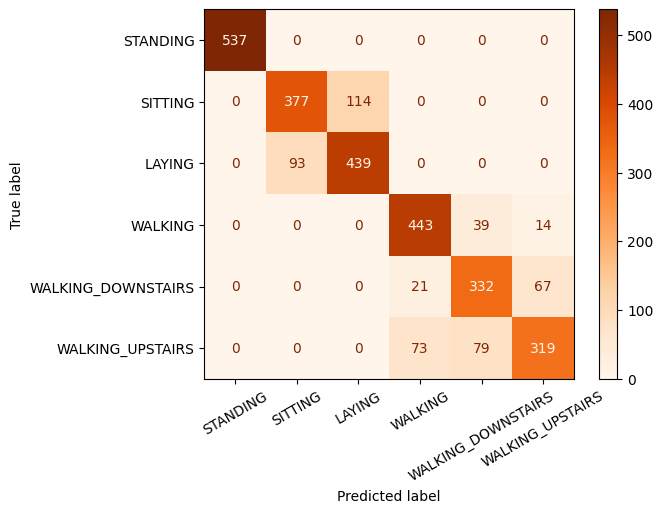

In [158]:
cm_kn = confusion_matrix(y_test_other ,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree , display_labels= df.Activity.unique())
disp.plot(cmap ='Oranges')
plt.xticks(rotation = 30)
plt.show()


##Conclusion
From the above prediction and model evaluation it is clear that " LOGISTIC REGRESSION " gives the best accuracy. Even for a random test data it gave an accuracy of 95%.